In [1]:
import sys
sys.path.append(r'C:\BigARTM\python')

In [8]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

In [34]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## Домашнее задание

Основаная задача - **построить хорошую тематическую модель с интерпретируемыми топиками**.

1) сделайте нормализацию (если pymorphy2 работает долго используйте mystem или попробуйте установить быструю версию - `pip install pymorphy2[fast]`, можно использовать какой-то другой токенизатор) 

2) добавьте нграммы (в тетрадке есть закомменченая ячейка с Phrases); 

3) сохраните тексты .vw формате;

4) сделайте хороший словарь (отфильтруйте слишком частотные и редкие слова, попробуйте удалить стоп-слова, сохраните словарь и посмотрите на него, вдруг что-то плохое сразу будет заметно); 

5) постройте несколько ARTM моделей (переберите количество тем, поменяйте значения tau у регуляризаторов), если получаются плохие темы, поработайте дополнительно над предобработкой и словарем; 

6) для самой хорошей модели в отдельной ячейке напечатайте 3 хороших (на ваш вкус) темы

7) в другой ячейки нарисуйте график обучения этой модели 

8) в третьей ячейки опишите какие параметры (количество тем, регуляризаторы, их tau) вы использовали и как обучали (например, после скольки проходов добавили регуляризатор разрежнивания тем (Phi), добавляли ли разреженность документам (Theta) и когда, как повышали значения, сколько итерации модель продожала улучшаться (снижалась перплексия, росли другие метрики);

Сохраните тетрадку с экспериментами и положите её на гитхаб, ссылку на неё укажите в форме.

**Оцениваться будут главным образом пункты 6, 7 и 8. (3, 1, 4 баллов соответственно). Чтобы заработать остальные 2 балла, нужно хотя бы немного изменить мой код на промежуточных этапах (добавить что-то, указать другие параметры и т.д). **

In [32]:
def remove_tags(text):
    return re.sub(r'<[^>]+>', ' ', text)

def clean(words):
    clean = [morph.parse(word)[0].normal_form for word in words if word.isalnum()]
    return clean

## Возьмем теже данные

In [33]:
habr_texts = [clean(word_tokenize(remove_tags(text.lower()))) for text in open('habr_texts.txt',encoding="utf-8")]

In [35]:
habr_texts[0]

['masstransit',
 'это',
 'open',
 'source',
 'библиотека',
 'разработать',
 'на',
 'язык',
 'c',
 'для',
 'платформа',
 'упрощать',
 'работа',
 'с',
 'шина',
 'дать',
 'который',
 'использоваться',
 'при',
 'построение',
 'распределенный',
 'приложение',
 'и',
 'реализация',
 'soa',
 'service',
 'oriented',
 'architecture',
 'в',
 'качество',
 'message',
 'broker',
 'мочь',
 'выступать',
 'rabbitmq',
 'azure',
 'service',
 'bus',
 'или',
 'менеджер',
 'в',
 'случай',
 'с',
 'область',
 'видимость',
 'ограничиваться',
 'процесс',
 'в',
 'который',
 'проинициализировать',
 'экземпляр',
 'команда',
 'и',
 'событиякоманда',
 'событие',
 'контракт',
 'сообщение',
 'роутингexchange',
 'формат',
 'сообщение',
 'консьюмер',
 'consumer',
 'конфигурация',
 'контейнер',
 'di',
 'наблюдатель',
 'observer',
 'новое',
 'в',
 'masstransit',
 'заключение',
 'опрос',
 'а',
 'какой',
 'библиотека',
 'использовать',
 'вы',
 'команда',
 'и',
 'событие',
 'в',
 'библиотека',
 'заложить',
 '2',
 'основный',

In [50]:
#немного расширим список стоп-слов
stop_words = stopwords.words('russian')
stop_words.extend(['get', 'lt', 't', 'gt', 'set', 'urn', 'host', 'where'])

In [52]:
#вернемся сюда через какое-то время
ph = gensim.models.Phrases(habr_texts, scoring='default', threshold=0.4, 
                           common_terms=stop_words) 
                                                                          
p = gensim.models.phrases.Phraser(ph)
ngrammed_habr_texts = p[habr_texts]

In [53]:
ngrammed_habr_texts[0]

['masstransit',
 'это',
 'open_source',
 'библиотека',
 'разработать',
 'на',
 'язык_c',
 'для',
 'платформа',
 'упрощать_работа',
 'с',
 'шина_дать',
 'который_использоваться',
 'при',
 'построение',
 'распределенный_приложение',
 'и',
 'реализация',
 'soa',
 'service',
 'oriented',
 'architecture',
 'в',
 'качество',
 'message',
 'broker',
 'мочь_выступать',
 'rabbitmq',
 'azure',
 'service',
 'bus',
 'или',
 'менеджер',
 'в',
 'случай',
 'с',
 'область_видимость',
 'ограничиваться',
 'процесс',
 'в',
 'который',
 'проинициализировать',
 'экземпляр',
 'команда',
 'и',
 'событиякоманда',
 'событие',
 'контракт',
 'сообщение',
 'роутингexchange',
 'формат',
 'сообщение',
 'консьюмер',
 'consumer',
 'конфигурация',
 'контейнер',
 'di',
 'наблюдатель',
 'observer',
 'новое',
 'в',
 'masstransit',
 'заключение',
 'опрос',
 'а',
 'какой',
 'библиотека_использовать',
 'вы',
 'команда',
 'и',
 'событие',
 'в',
 'библиотека',
 'заложить',
 '2',
 'основный_тип',
 'сообщение',
 'команда',
 'и',

Для BigARTM требуется специальный формат данных. Их несколько, но мы возьмем vowpal wabbit.  
На каждой строчке файла находится одельный текст, записывается такст вот таким образом:  
```doc_name |@class_id word_1:1 word_2:3```  

|@class_id - задает модальность, но когда она одна её можно не указывать.

word_2:3 - слово и его частота (обратите внимание, что : - специальный символ и в словах его быть не может

In [54]:
f = open('habr_texts1.vw', 'w', encoding="utf8")

for i, text in enumerate(ngrammed_habr_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()



Для оценки будем использовать такую функцию (из туториалов от создателей библиотеки)

In [66]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()
    

BigARTM работает не с целым файлом, а с кусочками. Поэтому разбиваем наш .vw файл специальным классом в artm.

In [55]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts1.vw',  
                                        data_format='vowpal_wabbit', 
                                        target_folder='batches', 
                                       batch_size=100) # возьмем размер батча 100

Уже созданные батчи можно заново загружать

In [56]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', # название папки с батчами
                                        data_format='batches') # указываем формат - батчи

In [57]:
# инициализируем словарь, чтобы сделать модель
dictionary = artm.Dictionary()

Собираем словарь по батчам

In [58]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

Его можно сохранить, чтобы не создавать снова или чтобы посмотреть и подредактировать.

In [59]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

Создаем модель и сразу включаем два регуляризатора (Декореляции и Сглаживания)

`artm.DecorrelatorPhiRegularizer` - регуляризатор декорреляции тем, делает темы менее похожими друг на друга (рекомендуется включать его сразу на всех темах с положительным значением tau и не менять его в процессе обучения)  

`artm.SmoothSparsePhiRegularizer` - регуляризатор сглаживания/разреженивания Phi (тем) - сглаживает или расреживает распределение слов в темах (отрицательный tau - разреживает, положительный - сглаживает), рекомендуется сразу включать сглаживание на всех темах и не менять его в процессе обучения;

Количество тем нужно подбирать, но 200 часто работает хорошо. Снижение количества тем и уменьшения словаря ведут к уменьшению времени обучения модели (а увеличение, наоборот). 

In [71]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(300)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

# не забывайте менять количество топиков в регуляризаторах, они применяются только на тех темах, что заданы

In [73]:
# инициализурем модель словарем
model_artm.initialize(dictionary=dictionary)

In [74]:
# добавляем метрики
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 

### Тренируем модель

Пройдемся несколько раз по коллекции, чтобы модель немного сошлась (если доков сильно больше то может быть достаточно и 1 прохода). Для сильно больших коллекций есть fit_online, который обновляется в процессе прохода по коллекции, про него можно почитать в документации.

In [75]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 1156.485 (ARTM)


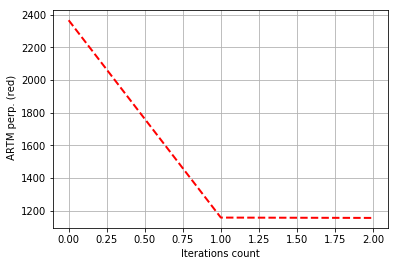

In [23]:
# для слов
print_measures(model_artm)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.003 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 1318.456 (ARTM)


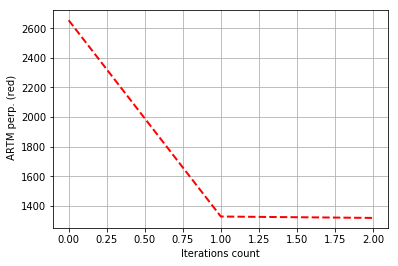

In [76]:
#для нграмм, видим, что перплексия выше, чем для слов
print_measures(model_artm)

Добавим регуляризаторы разреженности тем и документов.

Их рекомендуется добавлять после того, как модель уже как-то сошлась. После добавления их рекомендуется постепенно уменьшать, чтобы усиливать разреживание. Их можно применять не ко всем темам, чтобы в каких-то темах собрались все стоп-слова.

Можно добавлять их вместе или по отдельности.

In [77]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 300)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 300)]))

In [79]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [80]:
# будем постепенно увеличивать значения этих регуляризаторов, не меняю параметры, чтобы сравнить 
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.839 ARTM)
Sparsity Theta: 0.144 (ARTM)
Kernel contrast: 0.281 (ARTM)
Kernel purity: 0.215 (ARTM)
Perplexity: 722.094 (ARTM)


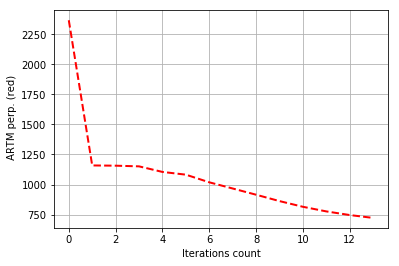

In [27]:
# для слов
print_measures(model_artm)

Sparsity Phi: 0.922 ARTM)
Sparsity Theta: 0.277 (ARTM)
Kernel contrast: 0.331 (ARTM)
Kernel purity: 0.359 (ARTM)
Perplexity: 763.487 (ARTM)


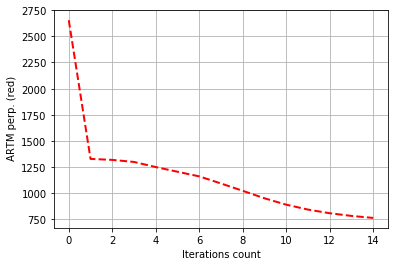

In [81]:
#для нграмм
print_measures(model_artm)

получилось, что для слов результат получше, перплексия ниже

In [28]:
# посмотрим на темы для слов
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
новогодний
капитан
приключение
рука
вот
дело
upd
заглядывать
милый
мороз
---------
topic_1: 
intel
ноутбук
процессор
устройство
память
компьютер
гб
lenovo
usb
оперативный
---------
topic_2: 
человек
курс
книга
социальный
ты
мой
сказать
день
вопрос
ли
---------
topic_3: 
информационный
решение
процесс
являться
разработка
компания
обеспечение
проект
результат
требование
---------
topic_4: 
говорить
процесс
робот
результат
современный
задача
дело
новое
качество
количество
---------
topic_5: 
устройство
регистратор
аккумулятор
китайский
камера
gps
дрон
батарея
аппарат
видео
---------
topic_6: 
ваш
продукт
пользователь
вопрос
человек
сайт
кто
хотеть
дизайн
да
---------
topic_7: 
заказчик
команда
scrum
задача
спринт
исполнитель
процесс
мониторинг
сервис
проект
---------
topic_8: 
1
print
2
file
gt
include
char
lt
open
3
---------
topic_9: 
программа
функция
язык
ошибка
часть
дерево
тип
некоторый
найти
следующий
---------
topic_10: 
надо
статья
вот
следующий
необходимый
часть
хотеть

In [82]:
#для нграмм
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
весь_это
точка_зрение
программный_обеспечение
сей_пора
самый_дело
это_год
это_время
речь_идти
большой_часть
человек_который
---------
topic_1: 
атака
безопасность
защита
злоумышленник
угроза
хакер
взлом
жертва
linkedin
заблокировать
---------
topic_2: 
стилус
обложка
лицо
планшет
цена
куда
помещение
видеокамера
россия
монтаж
---------
topic_3: 
информационный
иб
обеспечение
тп
требование
security
защита
стандарт
риск
асу
---------
topic_4: 
пациент
ibm
медицинский
университет
учёный
сердце
watson
врач
медицина
доктор
---------
topic_5: 
мозг
дрон
область
аппарат
дронов
мотор
полёт
страх
чувство
управление
---------
topic_6: 
фильм
голос
дом
рейтинг
часы
умный
устройство
микрофон
беспроводный
избиратель
---------
topic_7: 
мониторинг
админ
клиент
инцидент
заказчик
ответ
бывать
ошибка
сервис
чинить
---------
topic_8: 
флаг
задание
находить
python
flag
пробовать
your
ctfzone
попробовать
пароль
---------
topic_9: 
программа
ошибка
идея
глава
принцип
почему
её
концепция
книга
авто

Что-то топики получились такие себе, не очень